# Jachimowicz Szymon ISI2 - UM projekt

# Opis projektu:

Celem projektu jest zbudowanie modelu, który będzie przewidywał, czy pacjent ma cukrzycę na podstawie cech takich jak wiek, BMI, ciśnienie krwi, poziom cukru. Chcemy przeprowadzić dokładną diagnozę cukrzycy i uzyskać jak najbardziej dokładne prognozy.

# [Link do zestawu danych](https://www.kaggle.com/datasets/samira1992/diabetes-intermediate-dataset)

# Kroki



1.   Wczytanie i eksploracja danych.
2.   Podział danych na zbiory treningowy i testowy.
3.   Przetwarzanie i oczyszczanie danych.
4.   Transformacja danych.
5.   Wybór i uzasadnienie algorytmu modelu.
6.   Optymalizacja hiperparametrów.
7.   Ocena jakości modelu za pomocą różnych miar.
8.   Prezentacja wyników.




# Opis kolumn


1.   Pregnancies - W tej kolumnie znajdują się informacje o tym, ile razy pacjentka była w ciąży.
2.   Glucose - Kolumna ta informuje o stężeniu glukozy w osoczu po 2 godzinach w doustnym teście tolerancji glukozy.
3.   BloodPressure - Ta kolumna pokazuje rozkurczowe ciśnienie krwi (mmHg).
4.   SkinThickness - Ta kolumna zawiera informacje na temat grubości fałdu skórnego mięśnia trójgłowego uda (mm)
5.   Insulin - Ta kolumna zawiera informacje na temat 2-godzinnego podawania insuliny w surowicy (mu U/ml)
6.   BMI - Kolumna ta wskazuje wskaźnik masy ciała (BMI), obliczony jako masa ciała w kg podzielona przez kwadrat wzrostu w metrach.
7.   DiabetesPedigreeFunction - Ta kolumna przedstawia funkcję rodowodu cukrzycy.
8.   Age - Ta kolumna zawiera informacje o wieku pacjenta.
9.   Outcome - Ta kolumna w zbiorze danych jest wartością docelową, gdzie 0 oznacza „Nie” (zdrowy), a 1 oznacza „Tak” (cukrzyca).




# Dobór i podział danych

Podzielę dane na zbiór treningowy i testowy.

Zbiór treningowy = 70%.
Zbiór testowy = 30%.

In [ ]:
!pip install -U scikit-learn
!pip install pandas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.impute import SimpleImputer

In [ ]:
df = pd.read_csv('Diabetes.csv')

**Sprawdzenie danych**

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Zamiana w danych kolumnach wartosci 0 - reprezentujących dane puste, na NaN**

In [ ]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[columns_to_replace] = df[columns_to_replace].replace(0, np.nan)

In [ ]:
print(df.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


**Usunięcie duplikatów**

In [ ]:
df = df.drop_duplicates()

**Sprawdzenie rozkładu danych**

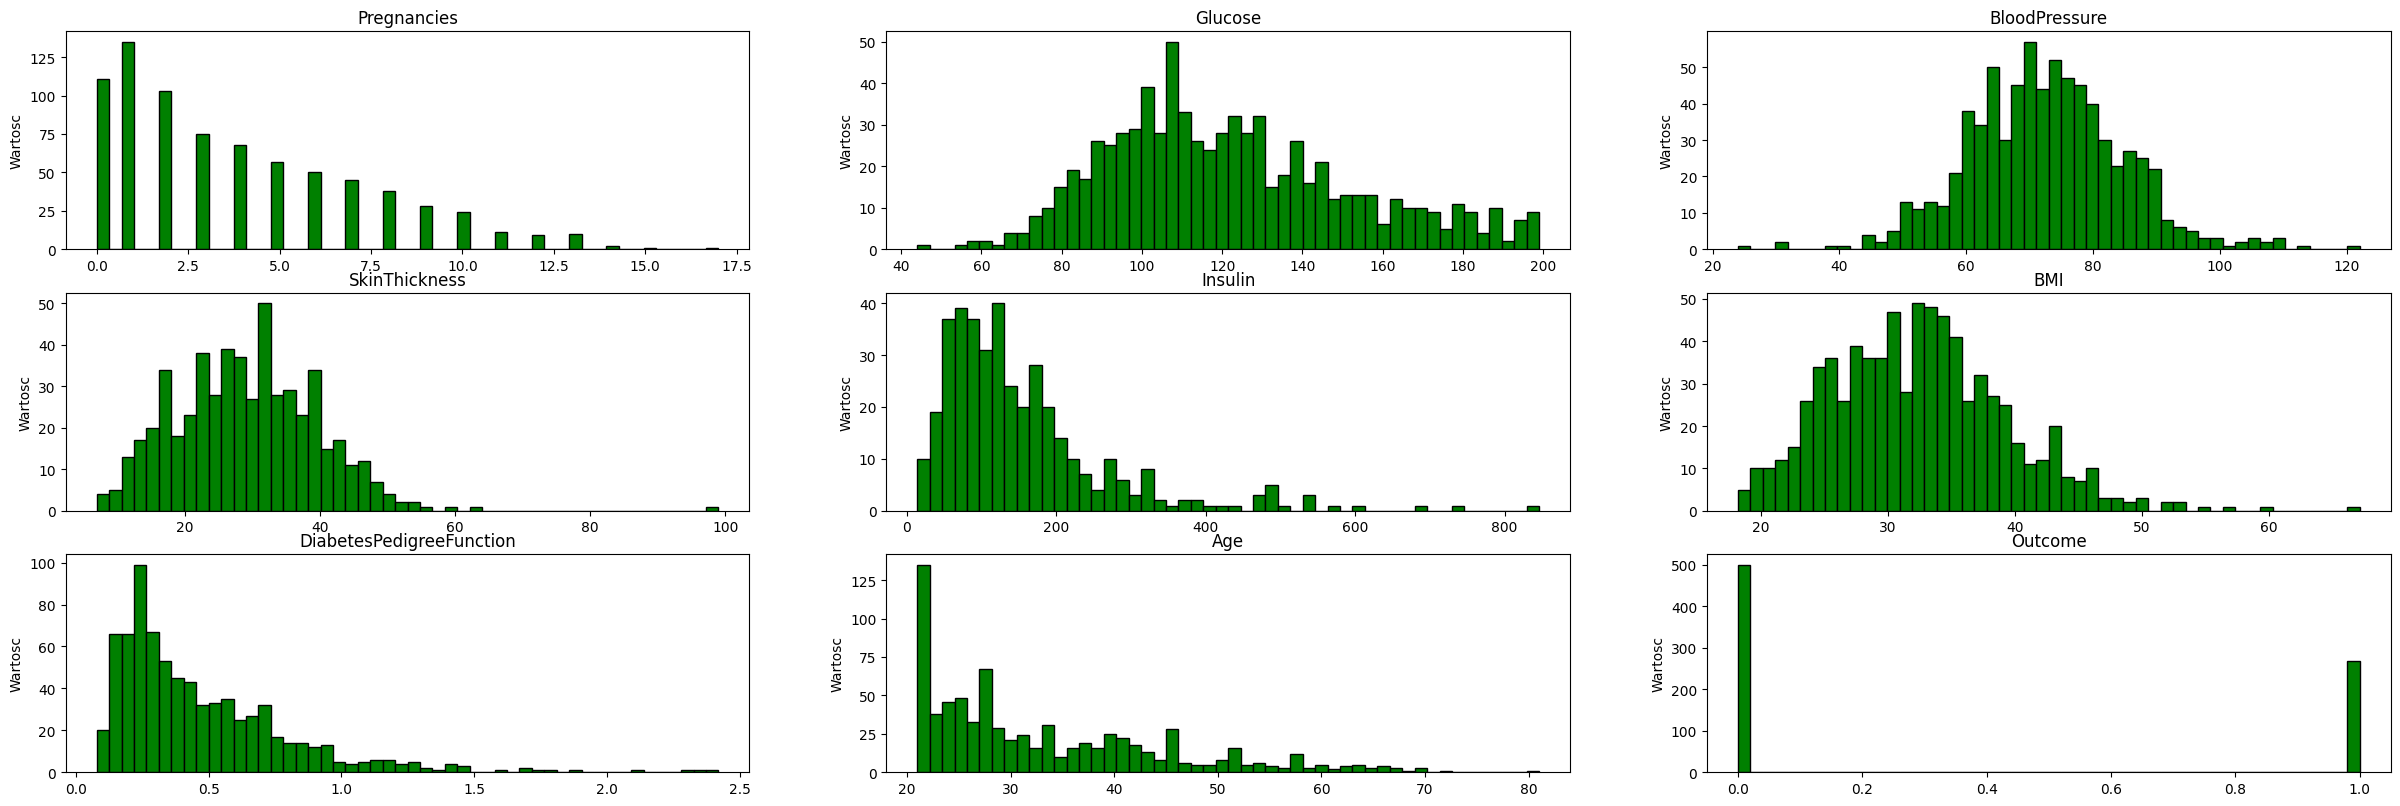

In [ ]:
numeric_features = df.columns

plt.figure(figsize=(30, 30))

for i, column in enumerate(numeric_features, 1):
    plt.subplot(len(numeric_features),3, i)
    plt.hist(df[column], bins=50, edgecolor='black', color="green")
    plt.title(f'{column}')
    plt.ylabel('Wartosc')

plt.show()

Ponieważ wszystkie kolumny to wartości numeryczne zastosuję proces skalowania. Poniżej testuje StandardScaler i MinMaxScaler.

Kolumną decyzyjną jest kolumna "Outcome", która przyjmuje wartości 0 i 1. Na histogramie widzimy, że osób zdrowych jest około dwa razy więcej niż chorych. Nie są to wyniki równomierne do siebie, dlatego zastosuje dokładność zbalansowaną.

# **Podział na zbiory treningowy i testowy**

In [ ]:
X = df.drop(columns=['Outcome'])
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(537, 8) (231, 8) (537,) (231,)




---



***C1K2: czy podział zachowuje proporcje balansu klas decyzyjnych?***

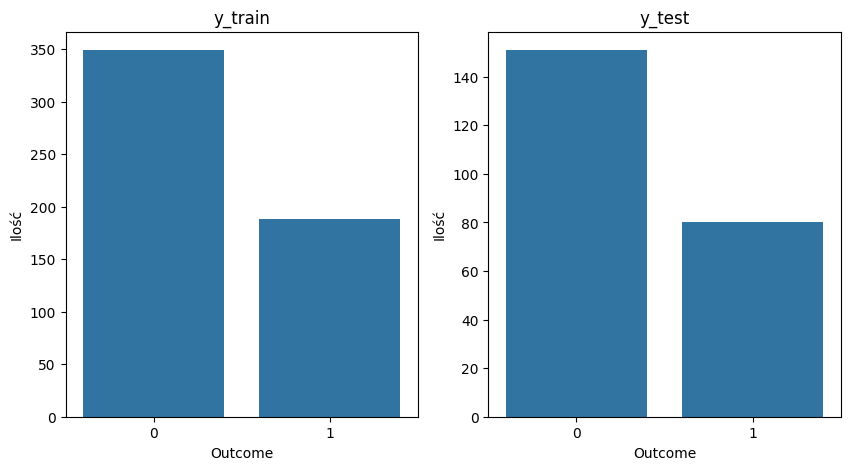

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.countplot(x=y_train, ax=axes[0])
axes[0].set_title('y_train')
axes[0].set_ylabel('Ilość')

sns.countplot(x=y_test, ax=axes[1])
axes[1].set_title('y_test')
axes[1].set_ylabel('Ilość')


plt.show()



---




# **Transformacja danych i modele**




## Wybór skalowania

### StandardScaler:

In [ ]:
numeric_transformer_standard = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

**KNN**

In [ ]:
pipeline_standardScaler_KNN = Pipeline([
    ('preprocessor', numeric_transformer_standard),
    ('classifier', KNeighborsClassifier())
])

In [ ]:
pipeline_standardScaler_KNN.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                 ('scaler', StandardScaler())])),
                ('classifier', KNeighborsClassifier())])

In [ ]:
y_pred_standard = pipeline_standardScaler_KNN.predict(X_test)

In [ ]:
print("Balanced accuracy:", balanced_accuracy_score(y_test, y_pred_standard))
standardKNN_accuracy = balanced_accuracy_score(y_test, y_pred_standard)

Balanced accuracy: 0.6896109271523179


**Drzewo decyzyjne**

In [ ]:
pipeline_standardScaler_DTC = Pipeline([
    ('preprocessor', numeric_transformer_standard),
    ('classifier', DecisionTreeClassifier())
])

In [ ]:
pipeline_standardScaler_DTC.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                 ('scaler', StandardScaler())])),
                ('classifier', DecisionTreeClassifier())])

In [ ]:
y_pred_standard = pipeline_standardScaler_DTC.predict(X_test)

In [ ]:
print("Balanced accuracy:", balanced_accuracy_score(y_test, y_pred_standard))
standardDTC_accuracy = balanced_accuracy_score(y_test, y_pred_standard)

Balanced accuracy: 0.6579884105960265


**Random Forest Classifier**

In [ ]:
pipeline_standardScaler_RFC = Pipeline([
    ('preprocessor', numeric_transformer_standard),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [ ]:
pipeline_standardScaler_RFC.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                 ('scaler', StandardScaler())])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [ ]:
y_pred_standard = pipeline_standardScaler_RFC.predict(X_test)

In [ ]:
print("Balanced accuracy:", balanced_accuracy_score(y_test, y_pred_standard))
standardRTC_accuracy = balanced_accuracy_score(y_test, y_pred_standard)

Balanced accuracy: 0.7411009933774835


### MinMaxScaler:

In [ ]:
numeric_transformer_minmax = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

**KNN**

In [ ]:
pipeline_minmax_KNN = Pipeline([
    ('preprocessor', numeric_transformer_minmax),
    ('classifier', KNeighborsClassifier())
])

In [ ]:
pipeline_minmax_KNN.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                 ('scaler', MinMaxScaler())])),
                ('classifier', KNeighborsClassifier())])

In [ ]:
y_pred_minmax = pipeline_minmax_KNN.predict(X_test)

In [ ]:
print("Balanced accuracy:", balanced_accuracy_score(y_test, y_pred_minmax))
minmaxKNN_accuracy = balanced_accuracy_score(y_test, y_pred_minmax)

Balanced accuracy: 0.6774834437086092


**Drzewo decyzyjne**

In [ ]:
pipeline_minmax_DTC = Pipeline([
    ('preprocessor', numeric_transformer_minmax),
    ('classifier', DecisionTreeClassifier())
])

In [ ]:
pipeline_minmax_DTC.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                 ('scaler', MinMaxScaler())])),
                ('classifier', DecisionTreeClassifier())])

In [ ]:
y_pred_minmax = pipeline_minmax_DTC.predict(X_test)

In [ ]:
print("Balanced accuracy:", balanced_accuracy_score(y_test, y_pred_minmax))
minmaxDTC_accuracy = balanced_accuracy_score(y_test, y_pred_minmax)

Balanced accuracy: 0.6833609271523179


**Random Forest Classifier**

In [ ]:
pipeline_minmax_RTC = Pipeline([
    ('preprocessor', numeric_transformer_minmax),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [ ]:
pipeline_minmax_RTC.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                 ('scaler', MinMaxScaler())])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [ ]:
y_pred_minmax = pipeline_minmax_RTC.predict(X_test)

In [ ]:
print("Balanced accuracy:", balanced_accuracy_score(y_test, y_pred_minmax))
minmaxRFC_accuracy = balanced_accuracy_score(y_test, y_pred_minmax)

Balanced accuracy: 0.7315397350993378


In [ ]:
print('StandardScaler + KNN balanced accuracy: ',standardKNN_accuracy)
print('StandardScaler + DTC balanced accuracy: ',standardDTC_accuracy)
print('StandardScaler + RFC balanced accuracy: ',standardRTC_accuracy)
print('MinMaxScaler + KNN balanced accuracy: ',minmaxKNN_accuracy)
print('MinMaxScaler + DTC balanced accuracy: ',minmaxDTC_accuracy)
print('MinMaxScaler + RFC balanced accuracy: ',minmaxRFC_accuracy)

StandardScaler + KNN balanced accuracy:  0.6896109271523179
StandardScaler + DTC balanced accuracy:  0.6579884105960265
StandardScaler + RFC balanced accuracy:  0.7411009933774835
MinMaxScaler + KNN balanced accuracy:  0.6774834437086092
MinMaxScaler + DTC balanced accuracy:  0.6833609271523179
MinMaxScaler + RFC balanced accuracy:  0.7315397350993378




---



***Porównując wyniki największą dokładność osiągamy dla StandardScaler'a i RandomForestClassifier równą: 0.7411009933774835***



---



# Optymalizacja hiperparametrów


**RandomForestClassifier - GridSearch**

In [ ]:
pipeline_standardScaler_RFC = Pipeline([
    ('preprocessor', numeric_transformer_standard),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [ ]:
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_features': [None, 'sqrt', 'log2'],
    'classifier__max_depth': [5, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

In [ ]:
grid_search = GridSearchCV(estimator=pipeline_standardScaler_RFC, param_grid=param_grid, cv=5, n_jobs=-1, scoring='balanced_accuracy')

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        Pipeline(steps=[('imputer',
                                                         SimpleImputer(strategy='median')),
                                                        ('scaler',
                                                         StandardScaler())])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [5, 20, 30],
                         'classifier__max_features': [None, 'sqrt', 'log2'],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [100, 200, 300]},
             scoring='balanced_accuracy')

In [ ]:
grid_search.best_params_

{'classifier__max_depth': 20,
 'classifier__max_features': 'log2',
 'classifier__min_samples_leaf': 2,
 'classifier__min_samples_split': 5,
 'classifier__n_estimators': 100}

In [ ]:
y_pred_test = grid_search.predict(X_test)
y_pred_train = grid_search.predict(X_train)

In [ ]:
print("Accuracy y_pred_test:", balanced_accuracy_score(y_test, y_pred_test))
print("Accuracy y_pred_train:", balanced_accuracy_score(y_train, y_pred_train))

Accuracy y_pred_test: 0.7278559602649006
Accuracy y_pred_train: 0.9715600804730842




---



***Różnica wynosi około 0.243 (24.37%). Jest ona na tyle duża, że model można uznać za przetrenowany.***



---



**RandomForestClassifier - manualne wprowadzanie parametrów**

In [ ]:
pipeline_standardScaler_RFC = Pipeline([
    ('preprocessor', numeric_transformer_standard),
    ('classifier', RandomForestClassifier(random_state=42, max_features="sqrt", max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200))
])

In [ ]:
pipeline_standardScaler_RFC.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                 ('scaler', StandardScaler())])),
                ('classifier',
                 RandomForestClassifier(max_depth=3, min_samples_leaf=5,
                                        min_samples_split=10, n_estimators=200,
                                        random_state=42))])

In [ ]:
y_pred_test = pipeline_standardScaler_RFC.predict(X_test)
y_pred_train = pipeline_standardScaler_RFC.predict(X_train)

In [ ]:
print("Accuracy y_pred_test:", balanced_accuracy_score(y_test, y_pred_test))
print("Accuracy y_pred_train:", balanced_accuracy_score(y_train, y_pred_train))

Accuracy y_pred_test: 0.7021523178807947
Accuracy y_pred_train: 0.736892641589953




---



***Różnica wynosi około 0.0347(3.47%), poprzez manualne dopasowanie hiperparametrów udało się poprawić jakość modelu, lecz wciąż jest przetrenowany.***



---

